# Bayesian Optimization of Composite Functions

This notebook demonstrates the use of the acquisition function in the paper *Bayesian Optimization of Composite Functions (Raul Astudillo, Peter I. Frazier)*.

The general idea is to optimize some function $g(h(x))$ where $g(\cdot)$ is a fast to evaluate, deterministic function and $h(x)$ is an unknown function, expensive to evaluate function.

The acquisition function, called EI-CF takes the form:

$$
\alpha_{EI-CF}(\mathbf{x}) = \mathbb{E}(\{y_{min} - g(h(\mathbf{x}))\}^+)
$$

In [1]:
from emukit.bayesian_optimization.acquisitions.composite_expected_improvement import CompositeExpectedImprovement
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement
from emukit.bayesian_optimization.loops import BayesianOptimizationLoop
from emukit.model_wrappers.gpy_model_wrappers import GPyMultiOutputWrapper, GPyModelWrapper
from emukit.core import ParameterSpace, ContinuousParameter

import numpy as np
import GPy

# Langermann function

We will replicate the experiment with the langermann function from the original paper. The langermann function is implemented below and the description can be found in the supplementary materials of the paper. The dimensionality of the various values is below:

$$
x \in [0, 10]^2
$$

$$
h(x) \in \mathbb{R}^5
$$

$$
g(h(x)) \in \mathbb{R}
$$

In [2]:
space = ParameterSpace([ContinuousParameter('x_1', 0, 10), ContinuousParameter('x_2', 0, 10)])

def langermann_h(x):
    A = np.array([[3, 5, 2, 1, 7], [5, 2, 1, 4, 9]])[:, :, None]
    h_x = np.sum(np.square(x.T[:, None, :] - A), axis=0)
    return h_x.T

def langermann_g(h_x):
    c = np.array([1, 2, 5, 2, 3])
    return -np.sum(c * np.exp(-h_x / np.pi) * np.cos(h_x * np.pi), axis=1, keepdims=True)

def langermann(x):
    return langermann_g(langermann_h(x))

In [3]:
initial_x = np.array([[0, 10], [5, 5], [10, 0], [5, 10]])
initial_h = langermann_h(initial_x)

# GPy Multioutput Model

In [4]:
gpy_model = GPy.models.GPRegression(initial_x, initial_h)
emukit_model = GPyMultiOutputWrapper(gpy_model, initial_h.shape[1], 10, verbose_optimization=False)

In [5]:
acquisition = CompositeExpectedImprovement(emukit_model, langermann_g, 50)

In [6]:
loop = BayesianOptimizationLoop(space, emukit_model, acquisition)

In [7]:
x = np.random.rand(1, 1, 50)
y = np.atleast_3d(np.random.rand(1000, 1))

(x * y).shape

(1000, 1, 50)

In [8]:
loop.run_loop(langermann_h, 40)

 /Users/marpulli/miniconda3/lib/python3.6/site-packages/paramz/transformations.py:111: RuntimeWarning:overflow encountered in expm1
 /Users/marpulli/git/GPy/GPy/kern/src/rbf.py:51: RuntimeWarning:overflow encountered in square
 /Users/marpulli/git/GPy/GPy/kern/src/stationary.py:168: RuntimeWarning:overflow encountered in true_divide
 /Users/marpulli/git/GPy/GPy/kern/src/rbf.py:54: RuntimeWarning:invalid value encountered in multiply
 /Users/marpulli/git/emukit/emukit/bayesian_optimization/acquisitions/composite_expected_improvement.py:39: RuntimeWarning:invalid value encountered in sqrt


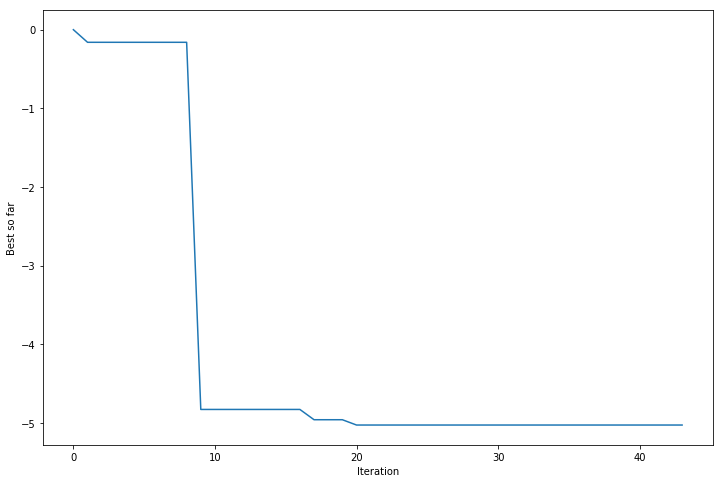

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(np.minimum.accumulate(langermann_g(loop.loop_state.Y)))
plt.xlabel('Iteration')
plt.ylabel('Best so far');

# Baseline EI model

In [10]:
initial_g = langermann(initial_x)
gpy_model = GPy.models.GPRegression(initial_x, initial_g)
emukit_g_model = GPyModelWrapper(gpy_model, n_restarts=10)

baseline_ei_acquisition = ExpectedImprovement(emukit_g_model)

baseline_loop = BayesianOptimizationLoop(space, emukit_g_model, baseline_ei_acquisition)

In [11]:
baseline_loop.run_loop(langermann, 40)

Optimization restart 1/10, f = 1.065393891314504
Optimization restart 2/10, f = 1.0653920646276172
Optimization restart 3/10, f = 1.0653920624704014
Optimization restart 4/10, f = 1.0653920624700395
Optimization restart 5/10, f = 1.06539206247004
Optimization restart 6/10, f = 1.0653920959347583
Optimization restart 7/10, f = 1.0653920624700395
Optimization restart 8/10, f = 1.065392062472994
Optimization restart 9/10, f = 1.065392062470219
Optimization restart 10/10, f = 1.0653920624700393
Optimization restart 1/10, f = -1.075148231743658
Optimization restart 2/10, f = -1.0751484658846975
Optimization restart 3/10, f = -1.0751474703931638
Optimization restart 4/10, f = -1.0751484452054174
Optimization restart 5/10, f = -1.0751477894382915
Optimization restart 6/10, f = -1.0751484083597118
Optimization restart 7/10, f = -1.0751484186564602
Optimization restart 8/10, f = -1.0751463155333871
Optimization restart 9/10, f = -1.0751483880164
Optimization restart 10/10, f = -1.07514842244463

Optimization restart 6/10, f = -1.5759173843859653
Optimization restart 7/10, f = -1.5759191191017354
Optimization restart 8/10, f = -1.5759188193018758
Optimization restart 9/10, f = -1.5759181607982224
Optimization restart 10/10, f = -1.5759191126759848
Optimization restart 1/10, f = -2.2707701381992784
Optimization restart 2/10, f = -2.2707701319471223
Optimization restart 3/10, f = -2.2707701337559545
Optimization restart 4/10, f = -2.270770069475839
Optimization restart 5/10, f = -2.2707701328391927
Optimization restart 6/10, f = -2.2707701326859837
Optimization restart 7/10, f = -2.2707698207415383
Optimization restart 8/10, f = -2.2707701346084725
Optimization restart 9/10, f = -2.2707695146650266
Optimization restart 10/10, f = -2.270769556521989
Optimization restart 1/10, f = -1.651374606583449
Optimization restart 2/10, f = -1.6513745824404271
Optimization restart 3/10, f = -1.6513744883171633
Optimization restart 4/10, f = -1.6513745162431483
Optimization restart 5/10, f = -

Optimization restart 2/10, f = 4.638066071528552
Optimization restart 3/10, f = 4.638067180818272
Optimization restart 4/10, f = 4.638066821061539
Optimization restart 5/10, f = 4.638066106639965
Optimization restart 6/10, f = 4.638068023627451
Optimization restart 7/10, f = 4.638066066443315
Optimization restart 8/10, f = 4.638066073622372
Optimization restart 9/10, f = 4.638066108152998
Optimization restart 10/10, f = 4.638066120499747
Optimization restart 1/10, f = 4.8209996023022725
Optimization restart 2/10, f = 4.820999641463395
Optimization restart 3/10, f = 4.820999621323537
Optimization restart 4/10, f = 4.821000111541636
Optimization restart 5/10, f = 4.8209996118098815
Optimization restart 6/10, f = 4.8210021361153
Optimization restart 7/10, f = 4.820999614286983
Optimization restart 8/10, f = 4.820999610890208
Optimization restart 9/10, f = 4.820999608746096
Optimization restart 10/10, f = 4.820999784808251
Optimization restart 1/10, f = 4.990337271037639
Optimization resta

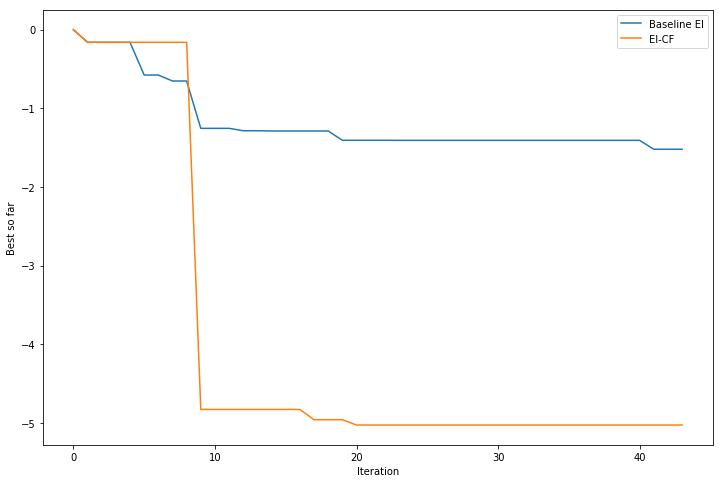

In [14]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 8))
plt.plot(np.minimum.accumulate(baseline_loop.loop_state.Y))
plt.plot(np.minimum.accumulate(langermann_g(loop.loop_state.Y)))
plt.xlabel('Iteration')
plt.ylabel('Best so far')
plt.legend(['Baseline EI', 'EI-CF']);